In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


## Открытие и изучение данных

Загрузим данные и посмотрим общую информацию:

In [2]:
try:

    df = pd.read_csv('games.csv', sep=',')
    
except:
    
    df = pd.read_csv('/datasets/games.csv', sep=',')
    
pd.options.display.max_columns = None

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Первые пять строк данных:

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Последние пять строк данных:

In [4]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Распределение:

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Проверим данные на дуюлакты:

In [6]:
df.duplicated().sum()

0

Дублкатов нет.

### Выводы

Перед нами набор данных об ирах выпущенных на разных платформах с 1980 до 2016 года. В данных много пропусков в столбцах с названием и жанром их всего два скорей всего ошибка выгрузки и это не очень важно. 
* В столбце с оценкой критиков пропущено больше половины значений возможно эти игры не оценивались критиками.
* В столбце с оценкой пользователей пропущено больше трети значений возможно пользователи не оставляли оценок для этих игр.
* Треть значений пропущено в столбце рейтинг - рейтинг от организации ESRB . Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Можно так же предподожить что часть игр не проходили оценку в данной организации.

Нужно по возможности заполнить эти пропуски и исправить ошибки в данных. 

Для ответа на главный вопрос какие закономерности определяют потенциальную успешность игры нам нужно:
* Определить актуальный период за который стоит расматривать данные что бы спрогнозировать продажи в 2017.
* Для этого сгруппировать данные по годам
* Определить наиболее популярные платформы
* Убрать выбросы по данным
* Посмотреть кареляцию, как влияют отзывы пользователей и критиков на продажи.
* Узнать какие жанры наиболее популярны и прибыльны.
* Изучить какие платформы сейчас набирают популярность и наиболее выгодны.
* Изучить предпочтения пользователей разных регионов.


## Подготовка данных

Приведем названия столбцов к нижнему регистру и проверим:

In [7]:
df.columns = df.columns.str.lower() 
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на пропуски в дате релиза:

In [9]:
df[df['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Заменим пропуски в годе релиза на ноль так как их не много и приведем год к целым числам:

In [10]:
df['year_of_release'] = (df['year_of_release'].fillna(0)).astype('int64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим на данные с пропусками в оценке критиков:

In [11]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Не очень понятно были ли вообще оценены данные игры критиками заменим их на ноль, будем считать что данных по ним нет

Посмотрим какие есть уникальные значения в оценке пользователей:

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных есть такое значение как tbd - To Be Determined будет определено позднее.Видимо пока для данных игр недостаточно оценок,заменим значение пропуском:

In [13]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

Посмотрим на данные с пропусками в оценке пользователей:

In [14]:
df[df['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Приведем столбец оценки пользователей в числовой вид:

In [15]:
df['user_score'] = pd.to_numeric(df['user_score'], downcast='float', errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float32
rating             9949 non-null object
dtypes: float32(1), float64(5), int64(1), object(4)
memory usage: 1.3+ MB


Округлим до десятых:

In [16]:
df['user_score'] = df['user_score'].astype('float64').round(1)
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Есть данные об оценке критиков и пользователей, и у них разная шкала оценки.
Думаю будет логично привести эти данные к одной 100 бальной шкале:

In [17]:
df['user_score'] = (df['user_score']*10)
df['user_score'].unique()

array([80., nan, 83., 85., 66., 84., 86., 77., 63., 74., 82., 90., 79.,
       81., 87., 71., 34., 53., 48., 32., 89., 64., 78., 75., 26., 72.,
       92., 70., 73., 43., 76., 57., 50., 91., 65., 88., 69., 94., 68.,
       61., 67., 54., 40., 49., 45., 93., 62., 42., 60., 37., 41., 58.,
       56., 55., 44., 46., 59., 39., 31., 29., 52., 33., 47., 51., 35.,
       25., 19., 30., 27., 22., 20., 95., 21., 36., 28., 18., 38.,  0.,
       16., 96., 24., 17., 11.,  3., 15.,  7., 12., 23.,  5., 13.,  2.,
        6., 14.,  9., 10., 97.])

Пропуски в данных по оценке пользователей оставим пропусками потому что данных либо не достаточно либо нет.

Посмотрим на пропуски в жанре и названии игры:

In [18]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как данных по этим двум позициям нет удалим их:

In [19]:
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посмотрим на значения в столбце с рейтингом о ESRB :

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Расшифровка категорий: 
* 'E' - для всех; 
* 'M' - От 17 лет; 
* 'AO' - только для взрослых; 
* 'T' - подросткам;
* 'K-A' - для детей и взрослых;
* 'E10+' - для всех старше 10 лет
* 'EC' - для детей младшего возраста
* 'RP' - рейтинг ожидается

Пропуски означают что оценки нет 

Создадим общий столбец с суммой всех продаж по каждой игре :

In [21]:
df['sum_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Выводы 
Рейтинги критиков и пользователей обработаны и приведены к стобальной шкале так будет проще изучать. Тип данных tbd так же заменен на пропуски.Создан новый столбец с суммой продаж по всем регионам для каждой игры.Можно приступать к изучению.

## Проанализируем данные 

Сгруппируем данные по годам и посмотрим сколько игр выпускалось в разные годы:

Text(0.5, 0, 'Год релиза')

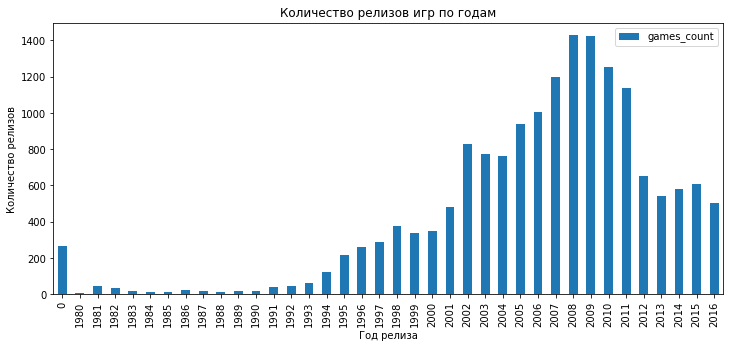

In [22]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')\
              .rename(columns ={'name':'games_count'})\
              .plot(y =  'games_count', kind = 'bar', figsize=(12, 5))

plt.title('Количество релизов игр по годам')
plt.ylabel('Количество релизов')
plt.xlabel('Год релиза')

Посмотрим на выбросы по годам:

Text(0.5, 0, 'Количество релизов')

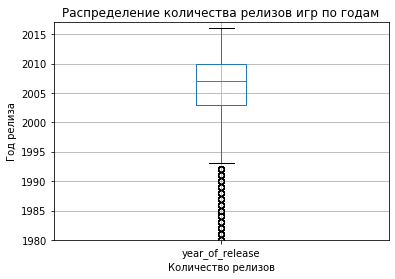

In [23]:
df.boxplot('year_of_release')
plt.ylim(1980,2017)
plt.title('Распределение количества релизов игр по годам')
plt.ylabel('Год релиза')
plt.xlabel('Количество релизов')

Глядя на графики выше понятно что все что ниже 1994 можно убрать:

In [24]:
df = df.query('year_of_release > 1994')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15958 entries, 0 to 16714
Data columns (total 12 columns):
name               15958 non-null object
platform           15958 non-null object
year_of_release    15958 non-null int64
genre              15958 non-null object
na_sales           15958 non-null float64
eu_sales           15958 non-null float64
jp_sales           15958 non-null float64
other_sales        15958 non-null float64
critic_score       7979 non-null float64
user_score         7459 non-null float64
rating             9763 non-null object
sum_sales          15958 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Сгруппируем данные по плотформам и посмотрим распределение по годам:

Text(0.5, 0, 'Назавание платформы')

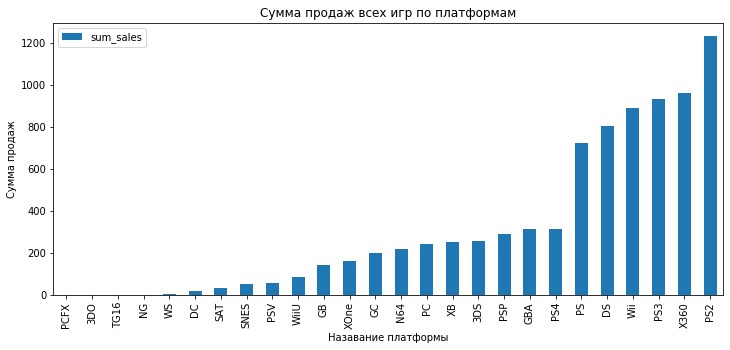

In [25]:
df.pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales')\
                                 .plot(y =  'sum_sales', kind = 'bar', figsize=(12, 5))
plt.title('Сумма продаж всех игр по платформам')
plt.ylabel('Сумма продаж')
plt.xlabel('Назавание платформы')

На графике видны очевидные шесть победителей, сделаем их список:

In [26]:
top = df.pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = 'sum')\
                                                     .sort_values(by = 'sum_sales', ascending =False)\
                                                     .reset_index()\
                                                     .head(6)    
top_6 = top['platform'].tolist()
print('Топ шесть платформ по сумме продаж:',top_6)

Топ шесть платформ по сумме продаж: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


Создадим сводную таблицу по срезу из этого списка

In [27]:
top_p = df.query('platform in (@top_6)')\
              .pivot_table(index = ['year_of_release','platform'], values = 'sum_sales', aggfunc = 'sum')\
              .reset_index()
top_p.head()

,year_of_release,platform,sum_sales
0,1995,PS,35.96
1,1996,PS,94.70
2,1997,PS,136.17
3,1998,PS,169.49
4,1999,PS,144.53


Построим график суммы продаж с разделением по плотформам и годам релиза:

Text(0.5, 0, 'Годы релиза')

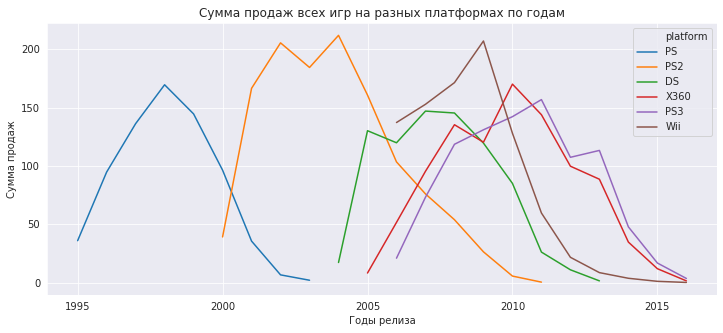

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize = (12, 5))
sns.lineplot(data=top_p, x="year_of_release", y="sum_sales", hue="platform", )
plt.title('Сумма продаж всех игр на разных платформах по годам')
plt.ylabel('Сумма продаж')
plt.xlabel('Годы релиза')

Как видно из этого графика с 2004 по 2006 появилось несколько новых платформ, и в среднем платформы живут около 10 лет потом перестают существовать, что логично их зменяют новые платформы. Так же видно что первые от 3 до 5 лет происходит рост, а потом выручка платформ начинает падать. Понятно что выбранные нами платформы уже потеряли популярность и у них есть более новые аналоги. Мы строим планы на 2017 год  - стоит посмотреть на платформы которые растут за последние 3 года.

Возьмем срез за последние 3 года и посмотрим какие платформы лидируют по сумме продаж:

Text(0.5, 0, 'Назавание платформы')

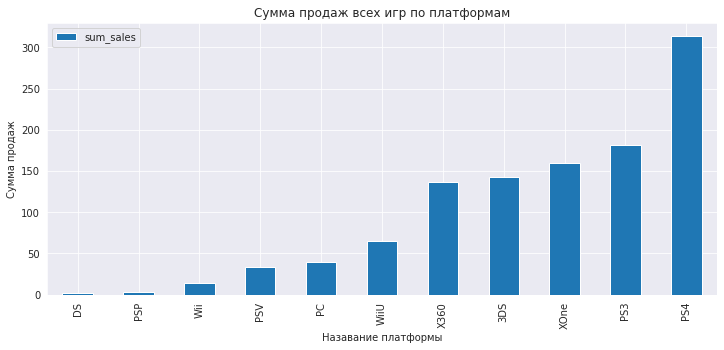

In [29]:
df.query('year_of_release > 2012')\
                .pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales')\
                .plot(y =  'sum_sales', kind = 'bar', figsize=(12, 5))
plt.title('Сумма продаж всех игр по платформам')
plt.ylabel('Сумма продаж')
plt.xlabel('Назавание платформы')

На этом графике мы тоже видим шесть победителей, но тут есть платформы которые давно существуют и идут на спад,
это 'X360' и 'PS3' тх можно исключить из списка и добавить 'PSV' и , создадим список:

In [30]:
top_n = df.query('year_of_release > 2012')\
                      .pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = 'sum')\
                      .sort_values(by = 'sum_sales', ascending =False)\
                      .reset_index()\
                      .head(6)    
    
top_6n = top_n['platform'].tolist()
print('Топ шесть платформ по сумме продаж:',top_6n)

Топ шесть платформ по сумме продаж: ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU']


Создадим сводную таблицу по срезу из этого списка:

In [31]:
top_pn = df.query('platform in (@top_6n) and year_of_release > 2012 ')\
              .pivot_table(index = ['year_of_release','platform'], values = 'sum_sales', aggfunc = 'sum')\
              .reset_index()
top_pn.head()

,year_of_release,platform,sum_sales
0,2013,3DS,56.57
1,2013,PS3,113.25
2,2013,PS4,25.99
3,2013,WiiU,21.65
4,2013,X360,88.58


Text(0.5, 0, 'Годы релиза')

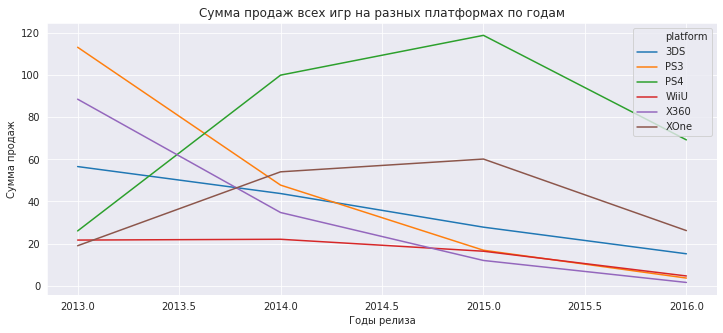

In [32]:
plt.figure(figsize = (12, 5))
sns.lineplot(data=top_pn, x="year_of_release", y="sum_sales", hue="platform", )
plt.title('Сумма продаж всех игр на разных платформах по годам')
plt.ylabel('Сумма продаж')
plt.xlabel('Годы релиза')

Судя по графику сейчас падает всё, возможно ожидаются новые платформы, пока же все таки предпочтения можно отдать PS4 и X360.

Построим ящик с усами  по глобальным продажам игр в разбивке по платформам:

Text(0.5, 0, 'Платформа')

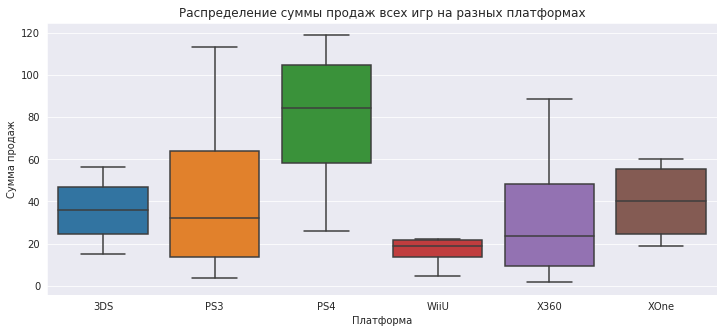

In [33]:
plt.figure(figsize = (12, 5))
sns.boxplot(x='platform', y='sum_sales', data=top_pn)
plt.title('Распределение суммы продаж всех игр на разных платформах')
plt.ylabel('Сумма продаж')
plt.xlabel('Платформа')

Что ж как видно на на этом графике лучше всех дела у PS4 затем XOne и потом 3DS

Посмотрим, как влияют на продажи на примере PS4 отзывы пользователей и критиков:

In [34]:
df.query('platform =="PS4" and year_of_release > 2012').corr()
             

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
sum_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Text(0.5, 0, 'Рейтинг пользователей')

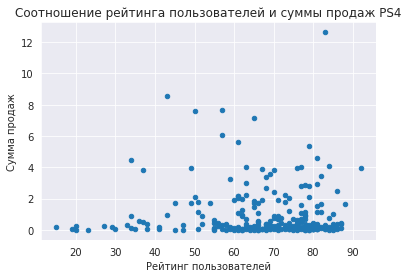

In [35]:
df.query('platform =="PS4" and year_of_release > 2012 and user_score > 0')\
        .plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Соотношение рейтинга пользователей и суммы продаж PS4')
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг пользователей')

Связь между оценкой пользователей и количеством продаж точно не прямая, но небольшая кореляция с суммы продаж с оценкой пользователей прослеживается

Text(0.5, 0, 'Рейтинг пользователей')

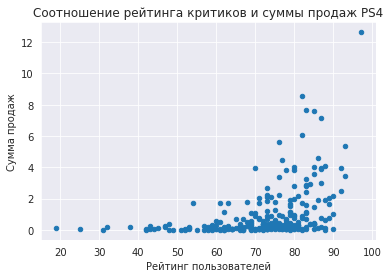

In [36]:
df.query('platform =="PS4" and year_of_release > 2012 and critic_score > 0')\
        .plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Соотношение рейтинга критиков и суммы продаж PS4')
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг пользователей')

Оценка критиков больше корелирует с суммой продаж чем оценка пользователей.

Посмотрим как отзывы карелируют на других платформах:

Text(0.5, 0, 'Рейтинг пользователей')

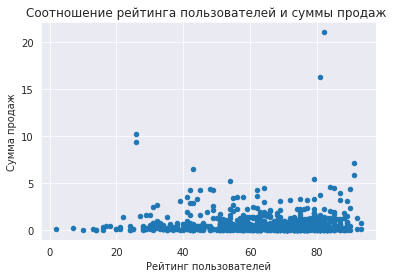

In [37]:
df.query('platform !="PS4" and year_of_release > 2012 and user_score > 0')\
        .plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Соотношение рейтинга пользователей и суммы продаж ')
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг пользователей')

Text(0.5, 0, 'Рейтинг пользователей')

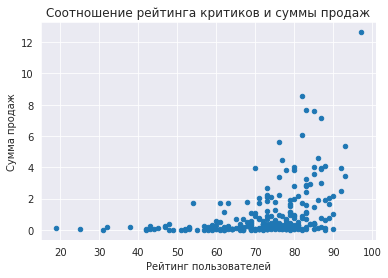

In [38]:
df.query('platform =="PS4" and year_of_release > 2012 and critic_score > 0')\
        .plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Соотношение рейтинга критиков и суммы продаж')
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг пользователей')

In [39]:
df.query('platform in (@top_6n) and year_of_release > 2012').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.146308,-0.098040,-0.083972,-0.102334,0.051382,0.039561,-0.135435
na_sales,-0.146308,1.000000,0.764407,0.261105,0.811969,0.350609,-0.008231,0.920138
eu_sales,-0.098040,0.764407,1.000000,0.243885,0.936991,0.312571,-0.008266,0.927229
jp_sales,-0.083972,0.261105,0.243885,1.000000,0.186606,0.161017,0.198368,0.433702
other_sales,-0.102334,0.811969,0.936991,0.186606,1.000000,0.316732,-0.002072,0.919664
critic_score,0.051382,0.350609,0.312571,0.161017,0.316732,1.000000,0.556692,0.359443
user_score,0.039561,-0.008231,-0.008266,0.198368,-0.002072,0.556692,1.000000,0.012941
sum_sales,-0.135435,0.920138,0.927229,0.433702,0.919664,0.359443,0.012941,1.000000


Судя по этим данным, в общем оценка критиков корелирует с продажами больше чем оценка пользователей, так же как и для PS4

Посмотрим на общее распределение игр по жанрам:

Text(0.5, 0, 'Название жанра')

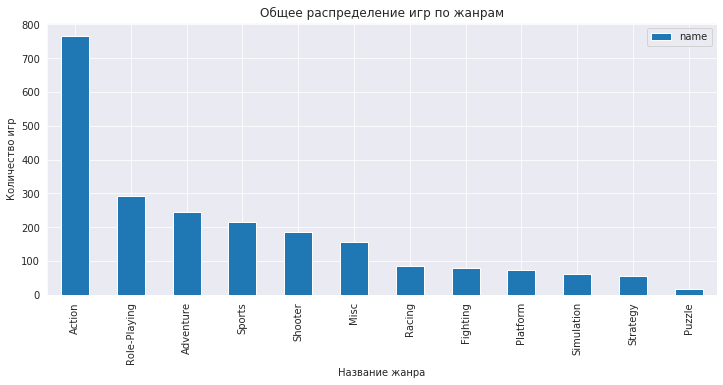

In [40]:
df.query('year_of_release > 2012')\
    .pivot_table(index ='genre', values = 'name', aggfunc = 'count')\
    .sort_values(by='name', ascending =False)\
    .plot(kind = 'bar', figsize = (12, 5))
plt.title('Общее распределение игр по жанрам')
plt.ylabel('Количество игр')
plt.xlabel('Название жанра')

Больше всего игр в жанре экшн и ролевых игр.

Посмотрим какие жанры лидируют по сумме продаж:

Text(0.5, 0, 'Название жанра')

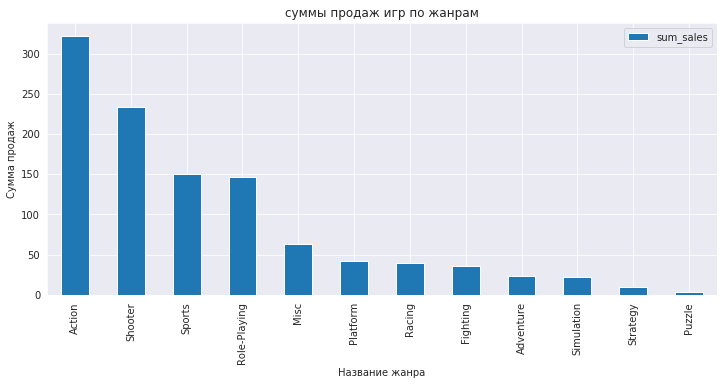

In [41]:
df.query('year_of_release > 2012')\
    .pivot_table(index ='genre', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False)\
    .plot(kind = 'bar', figsize = (12, 5))
plt.title('суммы продаж игр по жанрам')
plt.ylabel('Сумма продаж')
plt.xlabel('Название жанра')

Как видно из графика лидеры по сумме продажэто жанры Action и Shooter за ними Sports  и только потом Role-Playing

### Выводы

* с 2004 по начинают появлятся большой выбор новых платформ в среднем платформы живут 10 лет потом перестают существовать(станоаятся не популярны), что логично их зменяют новые платформы. Так же видно что первые от 3 до 5 лет происходит рост, а потом выручка платформ начинает падать.
* Оценка критиков больше влияет на продажи чем оценка пользователей. Видимо оценки критиков покупатели больше доверяют.
* Так как так как жанр shooter на 5 месте по количеству игр и на втором по сумме  продаж, можно сказать что данный жанр является наиболее прибыльным.

## Портрет пользователя каждого региона

### Портрет пользователя региона NA 
Формируем df со всеми платформами за Актуальный период в регионе NA и рисуем круговую диаграмму популярности всех платформ в регионе NA

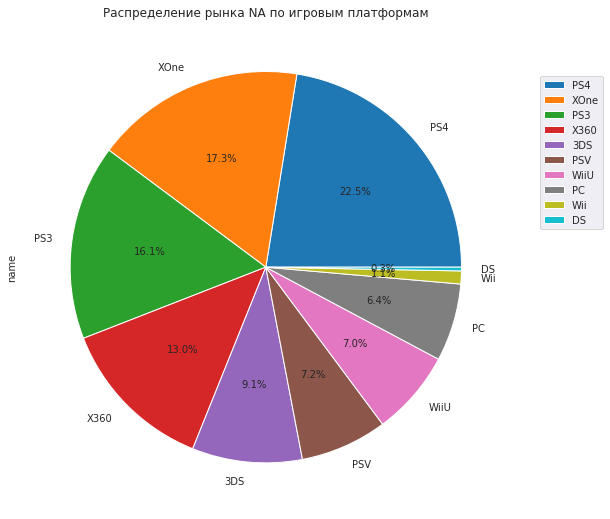

In [42]:
df.query('year_of_release > 2012 and na_sales > 0')\
    .pivot_table(index='platform', values='name', aggfunc='count')\
    .sort_values('name', ascending=False)\
    .plot(y="name", kind="pie", figsize=(9, 9), autopct='%1.1f%%')

plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) 
plt.title('Распределение рынка NA по игровым платформам') 
plt.show()

In [43]:
top_5_na = df.query('year_of_release > 2012 and na_sales > 0')\
    .pivot_table(index='platform', values='name', aggfunc='count')\
    .sort_values('name', ascending=False).head(5)\
    .reset_index()['platform'].tolist()
print('\033[1m'+'Топ пять платформ региона NA:')
print('\033[0m')
print(top_5_na)      

Топ пять платформ региона NA:

['PS4', 'XOne', 'PS3', 'X360', '3DS']


Определим самые популярные жанры в регионе NA:

Text(0.5, 0, 'Название жанра')

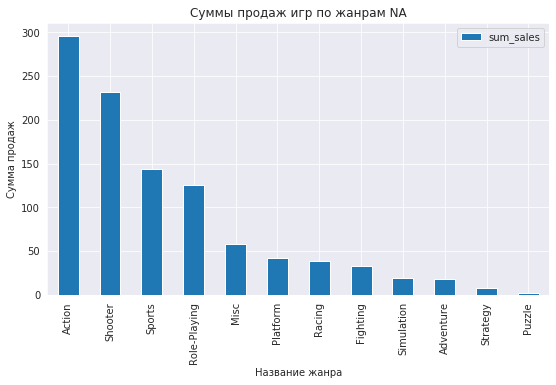

In [44]:
df.query('year_of_release > 2012 and na_sales > 0')\
    .pivot_table(index ='genre', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False)\
    .plot(kind = 'bar', figsize = (9, 5))
plt.title('Cуммы продаж игр по жанрам NA')
plt.ylabel('Сумма продаж')
plt.xlabel('Название жанра')

In [45]:
top_5g_na = df.query('year_of_release > 2012 and na_sales > 0')\
    .pivot_table(index ='genre', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False).head(5)\
    .reset_index()['genre'].tolist()
print('\033[1m'+'Топ пять жанров игр региона NA:')
print('\033[0m')
print(top_5g_na)

Топ пять жанров игр региона NA:

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


Посмотрим на влияние рейтинга ESRB на родажи игр в регионе:

Text(0.5, 1.0, 'Cуммы продаж игр по категориям ESRB в NA')

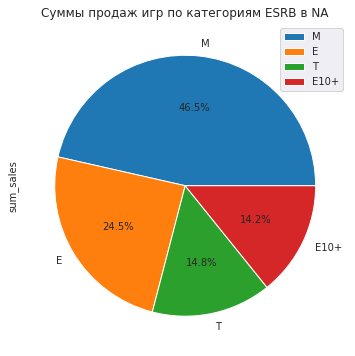

In [46]:
df.query('year_of_release > 2012 and na_sales > 0')\
    .pivot_table(index ='rating', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False)\
    .plot(y = 'sum_sales', kind="pie", figsize=(6, 6), autopct='%1.1f%%')
plt.title('Cуммы продаж игр по категориям ESRB в NA')


Как видно большая прибыль у категории М - от 17 лет

### Портрет пользователя региона EU 
Формируем df со всеми платформами за Актуальный период в регионе EU и рисуем круговую диаграмму популярности всех платформ в регионе NA

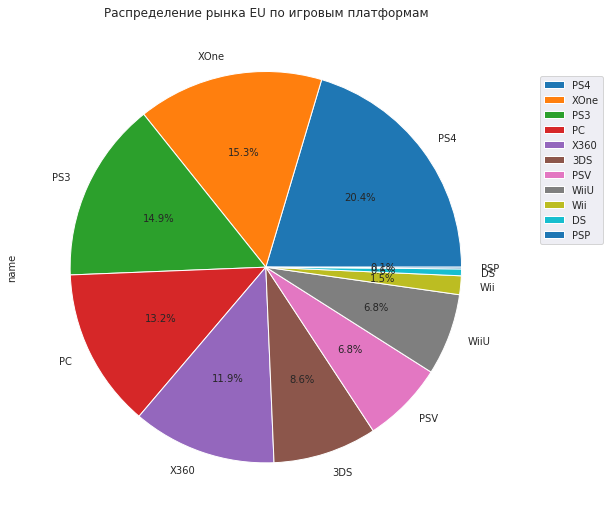

In [47]:
df.query('year_of_release > 2012 and eu_sales > 0')\
    .pivot_table(index='platform', values='name', aggfunc='count')\
    .sort_values('name', ascending=False)\
    .plot(y="name", kind="pie", figsize=(9, 9), autopct='%1.1f%%')

plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) 
plt.title('Распределение рынка EU по игровым платформам') 
plt.show()

In [48]:
top_5_eu = df.query('year_of_release > 2012 and eu_sales > 0')\
    .pivot_table(index='platform', values='name', aggfunc='count')\
    .sort_values('name', ascending=False).head(5)\
    .reset_index()['platform'].tolist()
print('\033[1m'+'Топ пять платформ региона EU:')
print('\033[0m')
print(top_5_eu)      

Топ пять платформ региона EU:

['PS4', 'XOne', 'PS3', 'PC', 'X360']


Определим самые популярные жанры в регионе EU:

Text(0.5, 0, 'Название жанра')

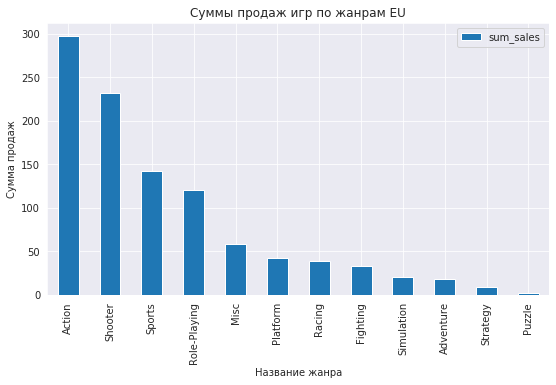

In [49]:
df.query('year_of_release > 2012 and eu_sales > 0')\
    .pivot_table(index ='genre', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False)\
    .plot(kind = 'bar', figsize = (9, 5))
plt.title('Cуммы продаж игр по жанрам EU')
plt.ylabel('Сумма продаж')
plt.xlabel('Название жанра')

In [50]:
top_5g_eu = df.query('year_of_release > 2012 and eu_sales > 0')\
    .pivot_table(index ='genre', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False).head(5)\
    .reset_index()['genre'].tolist()
print('\033[1m'+'Топ пять жанров игр региона EU:')
print('\033[0m')
print(top_5g_na)

Топ пять жанров игр региона EU:

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


Посмотрим на влияние рейтинга ESRB на родажи игр в регионе:

Text(0.5, 1.0, 'Cуммы продаж игр по категориям ESRB в EU')

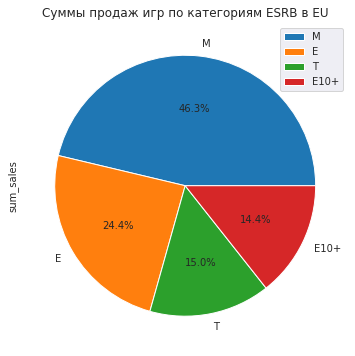

In [51]:
df.query('year_of_release > 2012 and eu_sales > 0')\
    .pivot_table(index ='rating', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False)\
    .plot(y = 'sum_sales', kind="pie", figsize=(6, 6), autopct='%1.1f%%')
plt.title('Cуммы продаж игр по категориям ESRB в EU')

Как видно большая прибыль у категории М - от 17 лет

### Портрет пользователя региона JP 
Формируем df со всеми платформами за Актуальный период в регионе JP и рисуем круговую диаграмму популярности всех платформ в регионе NA

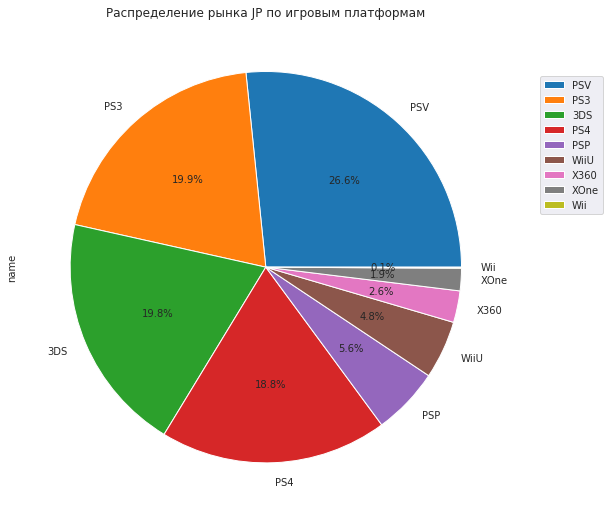

In [52]:
df.query('year_of_release > 2012 and jp_sales > 0')\
    .pivot_table(index='platform', values='name', aggfunc='count')\
    .sort_values('name', ascending=False)\
    .plot(y="name", kind="pie", figsize=(9, 9), autopct='%1.1f%%')

plt.legend(bbox_to_anchor=(0.6, 0, 0.6, 0.9)) 
plt.title('Распределение рынка JP по игровым платформам') 
plt.show()

In [53]:
top_5_jp = df.query('year_of_release > 2012 and jp_sales > 0')\
    .pivot_table(index='platform', values='name', aggfunc='count')\
    .sort_values('name', ascending=False).head(5)\
    .reset_index()['platform'].tolist()
print('\033[1m'+'Топ пять платформ региона JP:')
print('\033[0m')
print(top_5_jp)      

Топ пять платформ региона JP:

['PSV', 'PS3', '3DS', 'PS4', 'PSP']


Определим самые популярные жанры в регионе JP:

Text(0.5, 0, 'Название жанра')

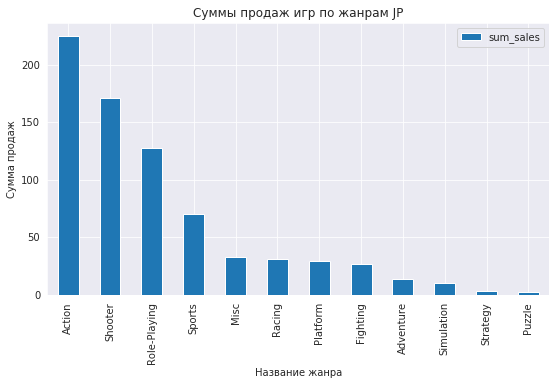

In [54]:
df.query('year_of_release > 2012 and jp_sales > 0')\
    .pivot_table(index ='genre', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False)\
    .plot(kind = 'bar', figsize = (9, 5))
plt.title('Cуммы продаж игр по жанрам JP')
plt.ylabel('Сумма продаж')
plt.xlabel('Название жанра')

In [55]:
top_5g_jp = df.query('year_of_release > 2012 and jp_sales > 0')\
    .pivot_table(index ='genre', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False).head(5)\
    .reset_index()['genre'].tolist()
print('\033[1m'+'Топ пять жанров игр региона JP:')
print('\033[0m')
print(top_5g_jp)

Топ пять жанров игр региона JP:

['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc']


Посмотрим на влияние рейтинга ESRB на родажи игр в регионе:

Text(0.5, 1.0, 'Cуммы продаж игр по категориям ESRB в JP')

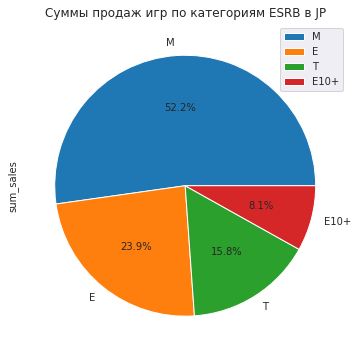

In [56]:
df.query('year_of_release > 2012 and jp_sales > 0')\
    .pivot_table(index ='rating', values = 'sum_sales', aggfunc = 'sum')\
    .sort_values(by='sum_sales', ascending =False)\
    .plot(y = 'sum_sales', kind="pie", figsize=(6, 6), autopct='%1.1f%%')
plt.title('Cуммы продаж игр по категориям ESRB в JP')

Как видно большая прибыль у категории М - от 17 лет

### Выводы

* В Европпе и Северной Америке лидируют платформы PS4 и XOne а в Японии на первое место выбралась PSV которой нет в списке лидеров в Европпе и Северной Америке. Так весомую долю в Японии занимает 3DS который так же есть в списке лидеров в  Европпе и Северной Америке.
* Жанр Shooter во всех регионах занимает уверненное 2-ое место
* Во всех регионах основная сумма продаж приходиться на игры катрегории М - от 17 лет по оценке ESRB

## Проверка гипотез 

* 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Для проверки первой гипотезы воспользуемся методом проверки гипотезы о равенстве средних двух генеральных совокупностей.
Формируем нулевую гипотезу:
* Средние пользовательские рейтинги Xone  равны средним пользовательским рейтингам PC

Альтернативная гипотеза:
* Средние пользовательские рейтинги Xone и PC отличаются

Список оценок пользователей XOne и его размер:

In [57]:
xone = df.query('platform == "XOne" and year_of_release > 2012')['user_score'].dropna().tolist()
len(xone)

182

Список оценок пользователей PC и его размер:

In [58]:
pc = df.query('platform == "PC" and year_of_release > 2012')['user_score'].dropna().tolist()
len(pc)

155

Критический уровень статистической значимости:

In [59]:
alpha = 0.05

Проверяем гипотезу о равенстве средних двух совокупностей.Будем использовать метод 'ttest_ind' и 'equal_var=False' так выборки разного размера:

In [60]:
results = st.ttest_ind(xone, pc, equal_var = False)  

print('p-значение:', results.pvalue)

if results.pvalue < alpha: #  сравниваем получившееся p-значение с заданным уровнем статистической значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу. А значит можем допустить что - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки второй гипотезы - "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" - сформируем так:
Нулевая гипотеза : 
* Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза : 
* Средние пользовательские рейтинги жанров Action и Sports различаются

Список оценок пользователей жанра Action  и его размер:

In [61]:
action = df.query('genre == "Action" and year_of_release > 2012')['user_score'].dropna().tolist()
len(action)

389

Список оценок пользователей жанра Sports  и его размер:

In [62]:
sports = df.query('genre == "Sports" and year_of_release > 2012')['user_score'].dropna().tolist()
len(sports)

160

Проверяем гипотезу о равенстве средних двух совокупностей.Будем использовать метод 'ttest_ind' и 'equal_var=False' так выборки разного размера:

In [63]:
results = st.ttest_ind(action, sports, equal_var = False)  

print('p-значение:', results.pvalue)

if results.pvalue < alpha: #  сравниваем получившееся p-значение с заданным уровнем статистической значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704734e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. А значит можем предположить что - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Выводы

* 1. Не получилось отвергнуть нулевую гипотезу. А значит можем допустить что - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* 2. Отвергли нулевую гипотезу. А значит можем предположить что - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


## Выводы

Из набора данных об ирах выпущенных на разных платформах с 1980 до 2016 года:
 
* с 2004 по начинают появлятся большой выбор новых платформ в среднем платформы живут 10 лет потом перестают существовать(станоаятся не популярны), что логично их зменяют новые платформы. Так же видно что первые от 3 до 5 лет происходит рост, а потом выручка платформ начинает падать. На основании этого был определен актуальный период  а имено год релиза с 2013 года.Оценка критиков больше влияет на продажи чем оценка пользователей. Видимо оценки критиков покупатели больше доверяют.
* На основании этого периода были определены лидеры по платформам среди них особо выделяется PS4
* Так как так как жанр shooter на 5 месте по количеству игр и на втором по сумме продаж, можно сказать что данный жанр является наиболее прибыльным.
* В Европпе и Северной Америке лидируют платформы PS4 и XOne а в Японии на первое место выбралась PSV которой нет в списке лидеров в Европпе и Северной Америке. Так весомую долю в Японии занимает 3DS который так же есть в списке лидеров в Европпе и Северной Америке.
* Жанр Shooter во всех регионах занимает уверненное 2-ое место
* Во всех регионах основная сумма продаж приходиться на игры катрегории М - от 17 лет по оценке ESRB

Проверены гипотезы:
* 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Результаты:
* 1. Не получилось отвергнуть нулевую гипотезу. А значит можем допустить что - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* 2. Отвергли нулевую гипотезу. А значит можем предположить что - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Рекомендации:
* Стоит отдать предпочтение играм на платформе PS4;
* Стоит отдать предпочтение играм в жанре Shooter;
* Стоит отдать предпочтение играм катрегории М - от 17 лет по оценке ESRB;

В данных графики даже топовых плотформ падают к 2016 году, что возможно говорит о том что в данных не хватает каой то переспективной платформы.
